### Kaggle 대회

 * URL : https://www.kaggle.com/
 * Competitions 선택하면 다양한 대회 확인 가능.
 * 대회 주제 : Bike Sharing Demand
 * https://www.kaggle.com/c/bike-sharing-demand

## 데이터 다운로드하기
* 가. https://www.kaggle.com/c/bike-sharing-demand 링크를 선택하여 웹 사이트 접속합니다.
* 나. Data를 선택합니다.
* 다. train.csv, test.csv, sampleSubmission.csv를 다운로드 받습니다.
* 라. 다운로드 받은 csv와 주피터 노트북 또는 py 파일은 동일한 폴더에 위치시킵니다.

In [8]:
from IPython.display import display, Image

### Data Fields
* datetime - hourly date + timestamp (시간 데이터 + timestamp)
* season -  1 = spring, 2 = summer, 3 = fall, 4 = winter  (봄[1], 여름[2], 가을[3], 겨울[4])
* holiday - whether the day is considered a holiday (휴일인지 아닌지)
* workingday - whether the day is neither a weekend nor holiday(일하는 날인지 아닌지)

* weather - 날씨에 따른 값
<br>1: Clear, Few clouds, Partly cloudy, Partly cloudy
<br>2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
<br>3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
<br>4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog <br>

* temp - temperature in Celsius (온도)
* atemp - "feels like" temperature in Celsius (체감온도)
* humidity - relative humidity (습도)
* windspeed - wind speed (바람 속도)
* casual - number of non-registered user rentals initiated (등록되지 않은 사용자의 빌린 자전거 대수)
* egistered - number of registered user rentals initiated (등록된 사용자의 빌린 자전거 대수)
* count - number of total rentals (자전거 빌린 총 대수 - 시간별)

In [9]:
import pandas as pd

### 1-1 데이터 준비하기

In [10]:
## train 데이터 셋 , test 데이터 셋
## train 은 학습을 위한 데이터 셋
## test 은 예측을 위한 데이터 셋(평가)
## parse_dates : datetime 컬럼을 시간형으로 불러올 수 있음
train = pd.read_csv("bike/train.csv", parse_dates=['datetime'])
test = pd.read_csv("bike/test.csv", parse_dates=['datetime'])

In [11]:
print(train.shape)   # : 행과 열 갯수 확인
print(test.shape)

(10886, 12)
(6493, 9)


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.6 KB


In [14]:
import matplotlib.pyplot as plt ## seaborn 보다 고급 시각화 가능. but 코드 복잡
import seaborn as sns           ## seaborn은 matplotlib보다 간단하게 사용 가능

### 1-2 데이터 탐색해 보기 - 시각화
 * 범주형 데이터 : 'season', 'holiday', 'workingday', 'weather'

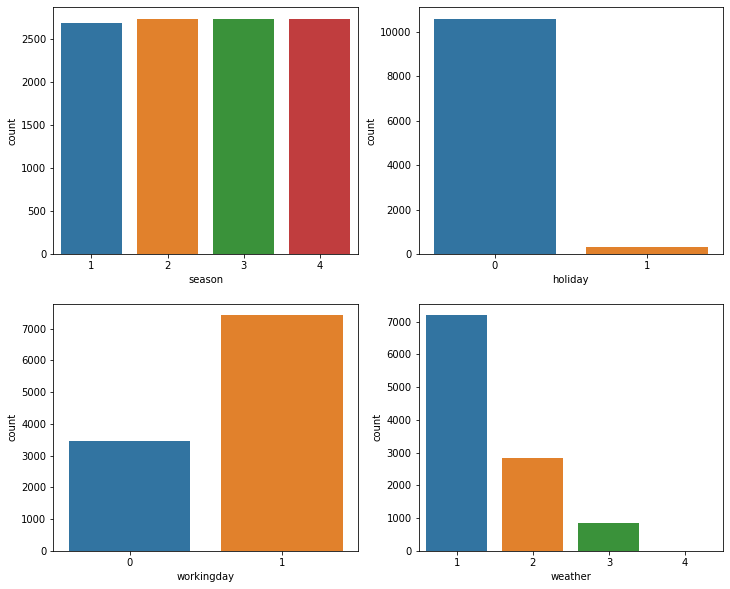

In [15]:
col_names = [ 'season', 'holiday', 'workingday', 'weather'  ]
i = 0
plt.figure(figsize=(12,10))   # 전체 그래프의 크기 지정 

for name in col_names:        # 컬럼명을 전달 리스트 수 만큼 반복 -> 4회 
    i = i + 1                 # 숫자를 1씩 증가.
    plt.subplot(2,2,i)        # 2행 2열에 i번째 그래프 선택
    sns.countplot(name, data=train)  # i번째 그래프에 sns.countplot를 그리겠다.
    
plt.show()  # 주피터에서 보여주지만, 다른곳(editor, pycharm)에서는 이걸 실행시켜야 한다. 

### 수치형 데이터 선택

In [16]:
### temp, atemp, humidity, windspeed

num_names = ['temp', 'atemp', 'humidity', 'windspeed']
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

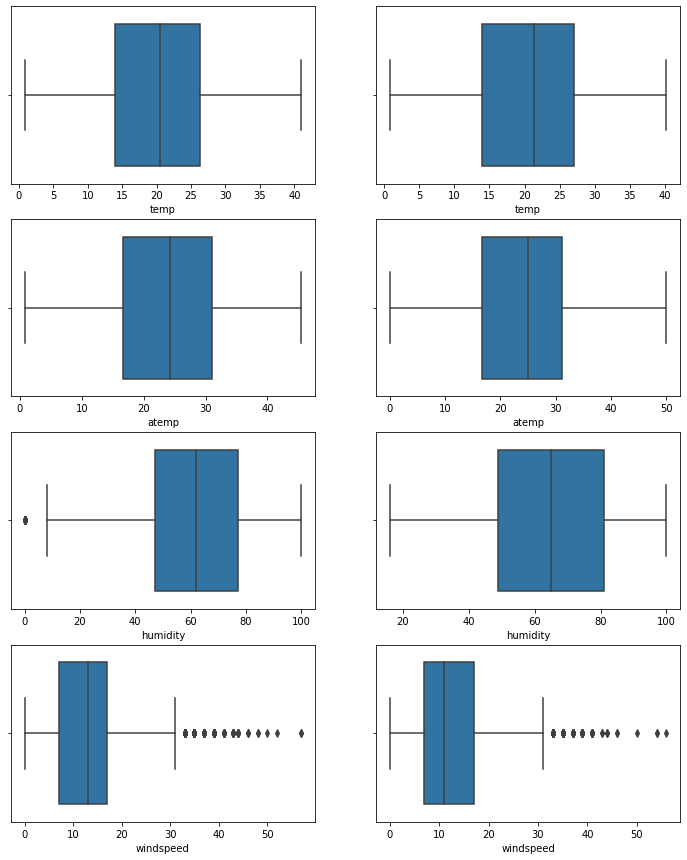

In [17]:
# par(mfrow=c(2,2)) -> R

i = 0
plt.figure(figsize=(12,15))   # 전체 그래프의 크기 지정 (가로, 세로)

for name in num_names:        # 컬럼명을 전달 리스트 수 만큼 반복 -> 4회
    i = i + 1                 # 숫자를 1씩 증가.
    plt.subplot(4,2,i*2-1)        # 2행 2열에 i번째 그래프 선택
    sns.boxplot(name, data=train)  # i번째 그래프에 sns.countplot를 그리겠다.
    plt.subplot(4,2,i*2)        # 2행 2열에 i번째 그래프 선택
    sns.boxplot(name, data=test)  # i번째 그래프에 sns.countplot를 그리겠다.
    
plt.show() 

In [18]:
new_tr = train.copy()   # 데이터 백업
new_test = test.copy()
new_tr.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

### 1-3 파생변수(더미변수) 생성

In [19]:
## 더미변수, 파생변수 생성
new_tr['year'] = new_tr['datetime'].dt.year
new_tr.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011


In [20]:
new_tr['month'] = new_tr['datetime'].dt.month
new_tr['day'] = new_tr['datetime'].dt.day
new_tr['hour'] = new_tr['datetime'].dt.hour
new_tr['minute'] = new_tr['datetime'].dt.minute
new_tr['second'] = new_tr['datetime'].dt.second
new_tr['dayofweek'] = new_tr['datetime'].dt.dayofweek
new_tr.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,5


In [21]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

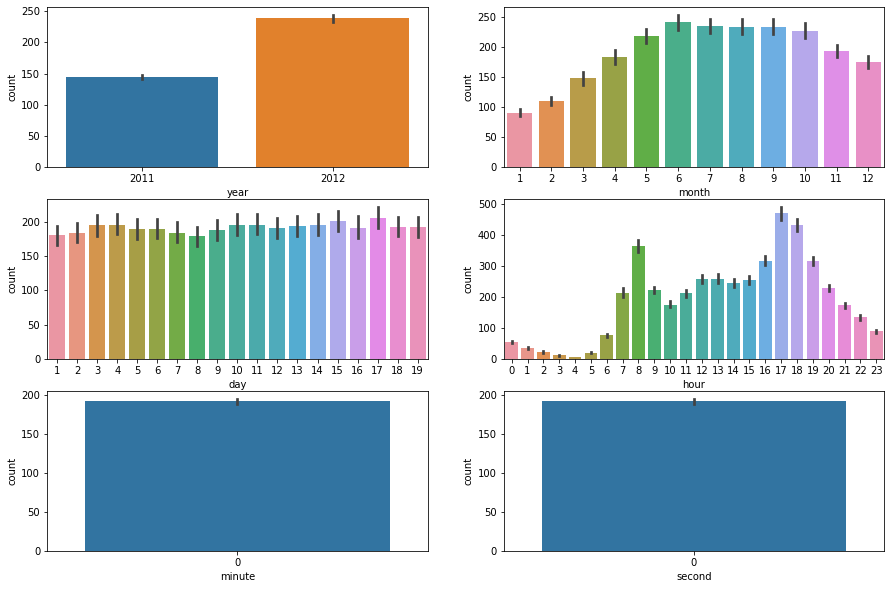

In [22]:
datetime_names = ['year', 'month', 'day', 'hour', 'minute', 'second']

i=0
plt.figure(figsize=(15,10))
for name in datetime_names:
    i = i + 1
    plt.subplot(3,2,i)
    sns.barplot(x=name, y='count', data=new_tr)
    
plt.show()

## 확인
 * 2011년, 2012년이 더 많다. (성장했는가?)
 * 여름이 많다.
 * day는 고른 분포를 보인다.
 * hour는 8시, 17,18시대에 많다. (새벽 시간대도 있구나... 음.)
 * minute, second는 0 데이터 의미가 없음.
 * day 1~19 일... 20일이 없네요.(test)

In [23]:
new_test['year'] = new_test['datetime'].dt.year
new_test['month'] = new_test['datetime'].dt.month
new_test['day'] = new_test['datetime'].dt.day
new_test['dayofweek'] = new_test['datetime'].dt.dayofweek
new_test['hour'] = new_test['datetime'].dt.hour
new_test['minute'] = new_test['datetime'].dt.minute
new_test['second'] = new_test['datetime'].dt.second

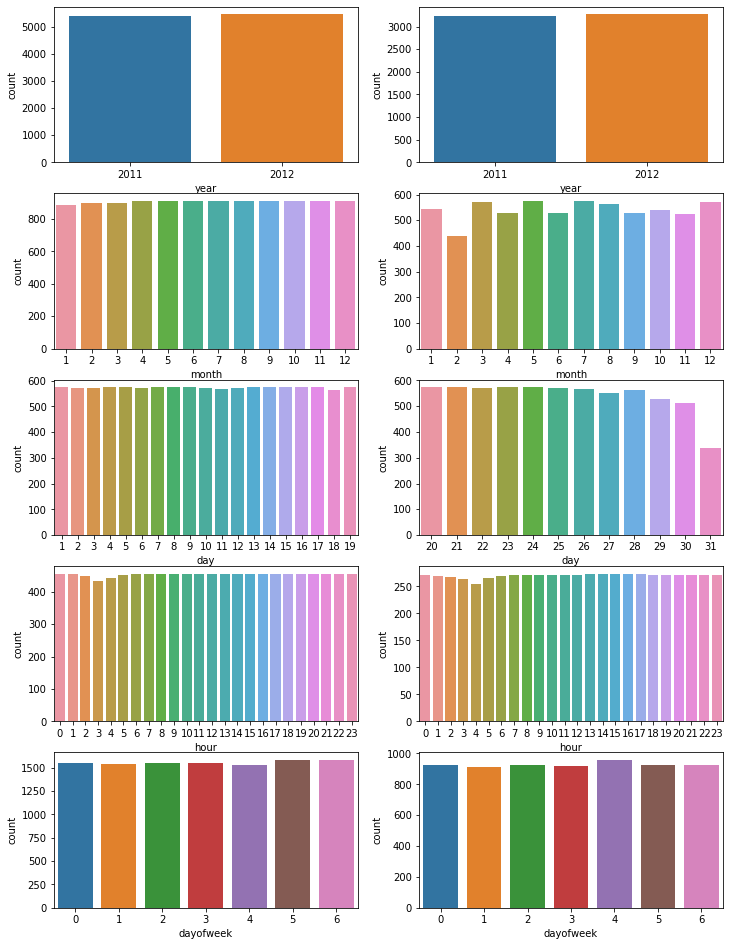

In [24]:
col_names = ['year','month','day','hour','dayofweek']
i = 0

plt.figure(figsize=(12,20))  ##전체 그래프 크기 지정

for name in col_names: ## 컬럼명으로 반복
  i = i+1
  plt.subplot(6,2,i)  ##2행2열, i = 1,2,3,4 (왼쪽 상단부터 시계방향으로 순번 지정)
  sns.countplot(name, data = new_tr)
  
  i = i+1
  plt.subplot(6,2,i)  ##2행2열, i = 1,2,3,4 (왼쪽 상단부터 시계방향으로 순번 지정)
  sns.countplot(name, data = new_test)
  
plt.show()

### 변수 생성

In [26]:
new_tr['dayofweek'] = new_tr['datetime'].dt.dayofweek  # Monday=0, Sunday=6

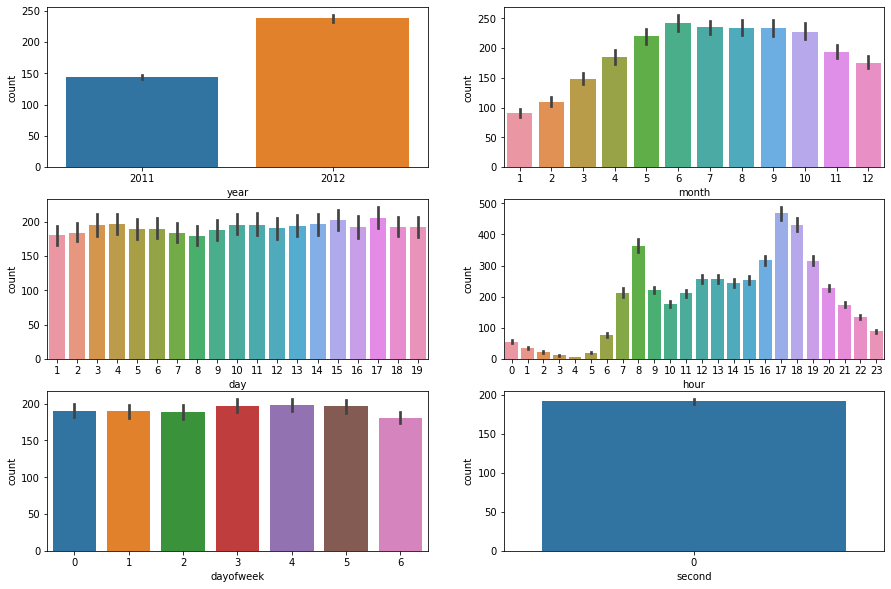

In [27]:
datetime_names = ['year', 'month', 'day', 'hour', 'dayofweek', 'second']

i=0
plt.figure(figsize=(15,10))
for name in datetime_names:
    i = i + 1
    plt.subplot(3,2,i)
    sns.barplot(x=name, y='count', data=new_tr)
    
plt.show()

In [28]:
print(new_test.shape)
new_test[["datetime", "year", "month", "day", "hour", "minute", "second", "dayofweek"]].head()

(6493, 16)


,datetime,year,month,day,hour,minute,second,dayofweek
0,2011-01-20 00:00:00,2011,1,20,0,0,0,3
1,2011-01-20 01:00:00,2011,1,20,1,0,0,3
2,2011-01-20 02:00:00,2011,1,20,2,0,0,3
3,2011-01-20 03:00:00,2011,1,20,3,0,0,3
4,2011-01-20 04:00:00,2011,1,20,4,0,0,3


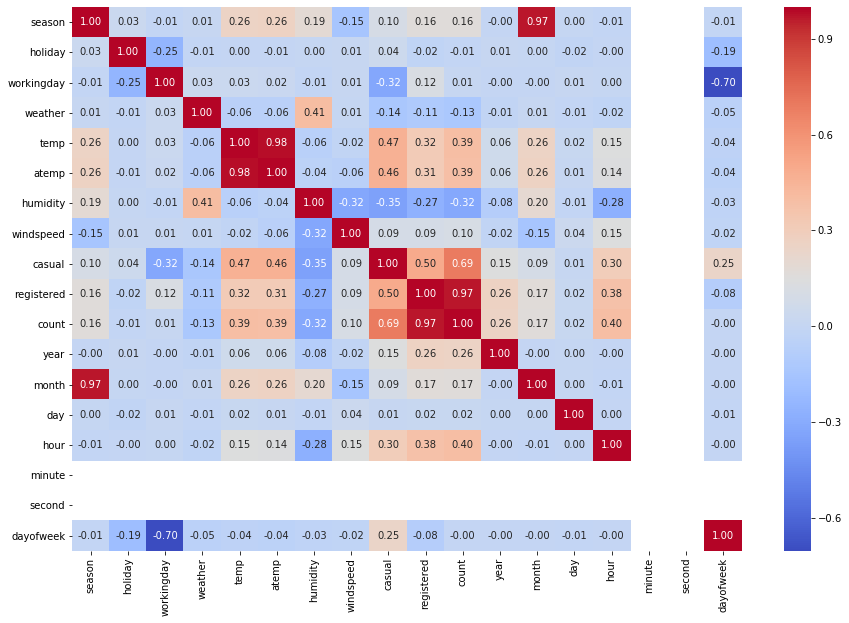

In [29]:
plt.figure(figsize=(15,10))
g = sns.heatmap(new_tr.corr(), annot=True, fmt=".2f", cmap="coolwarm")

In [28]:
print(new_tr.columns)
print(new_test.columns)

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute', 'second', 'dayofweek'],
      dtype='object')
Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'year', 'month', 'day', 'dayofweek',
       'hour', 'minute', 'second'],
      dtype='object')


In [30]:
feature_names = [ 'season', 'holiday', 'workingday', 'weather', 
                  'temp', 'atemp', 'humidity', 'windspeed', 
                  "year", "hour", "dayofweek"]  # 공통 변수

X_train = new_tr[feature_names]  # 학습용 데이터 변수 선택
X_test = new_test[feature_names]    # 테스트 데이터의 변수 선택 
print(X_train.head())

   season  holiday  workingday  weather  temp   atemp  humidity  windspeed  \
0       1        0           0        1  9.84  14.395        81        0.0   
1       1        0           0        1  9.02  13.635        80        0.0   
2       1        0           0        1  9.02  13.635        80        0.0   
3       1        0           0        1  9.84  14.395        75        0.0   
4       1        0           0        1  9.84  14.395        75        0.0   

   year  hour  dayofweek  
0  2011     0          5  
1  2011     1          5  
2  2011     2          5  
3  2011     3          5  
4  2011     4          5  


In [31]:
label_name = 'count'                # 렌탈 대수 (종속변수)
y_train = new_tr[label_name]        # 렌탈 대수 변수 값 선택

### 1-4 모델 만들기 및 제출

### 모델 만들기 및 예측 순서
 * 모델을 생성한다. model = 모델명()
 * 모델을 학습한다.  model.fit( 입력값, 출력값 )
 * 모델을 이용하여 예측 model.predict(입력값)

In [32]:
from sklearn.linear_model import LinearRegression   # 선형회귀
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)   # 예측(새로운 데이터로)
predictions

array([-23.27179232, -20.84936197, -13.04580719, ..., 209.84495832,
       227.95174821, 217.86201958])

In [33]:
sub = pd.read_csv("bike/sampleSubmission.csv")
sub['count'] = predictions
sub.head()

,datetime,count
0,2011-01-20 00:00:00,-23.271792
1,2011-01-20 01:00:00,-20.849362
2,2011-01-20 02:00:00,-13.045807
3,2011-01-20 03:00:00,-1.986454
4,2011-01-20 04:00:00,5.817101


### 음수에 대한 값처리
 * count가 0이하의 경우에 대해서 'count'를 0으로 한다.

In [34]:
sub.loc[ sub['count'] < 0, 'count' ] = 0
sub.loc[ sub['count'] < 0, : ]

,datetime,count


In [35]:
# 처음 만는 제출용 csv 파일, 행번호를 없애기
sub.to_csv("firstsubmission.csv", index=False)

### 의사 결정 트리 모델 만들기

In [36]:
from sklearn.tree import DecisionTreeRegressor   

model = DecisionTreeRegressor()  # 모델 객체 생성.
model.fit(X_train, y_train)   
pred_2 = model.predict(X_test)   # 예측(새로운 데이터로)
pred_2

array([  7.,   4.,   3., ...,  71., 106.,  41.])

array([  7.,   4.,   3., ...,  71., 100.,  46.])

(array([2619., 1336., 1014.,  647.,  353.,  264.,  125.,   63.,   56.,
          16.]),
 array([  1. ,  98.6, 196.2, 293.8, 391.4, 489. , 586.6, 684.2, 781.8,
        879.4, 977. ]),
 <a list of 10 Patch objects>)

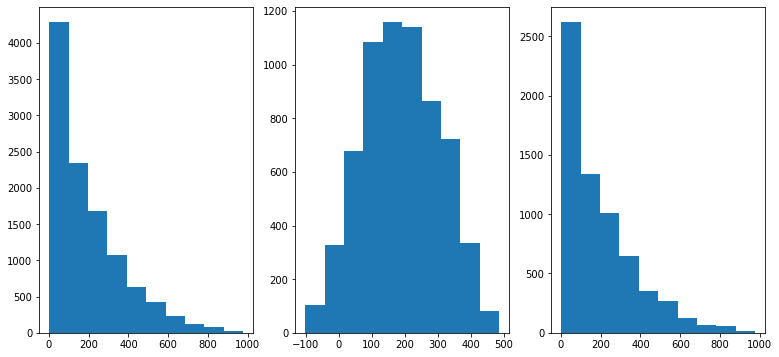

In [37]:
plt.figure(figsize=(13,6))
plt.subplot(1,3,1)
plt.hist(new_tr['count'])      #  학습용 데이터 자전거 렌탈 대수
plt.subplot(1,3,2)
plt.hist(predictions) #  선형 회귀로 테스트 데이터 이용 예측한 대수
plt.subplot(1,3,3)
plt.hist(pred_2)     #  의사결정트리로 테스트 데이터 이용 예측한 대수

In [38]:
from sklearn.ensemble import RandomForestRegressor   # 앙상블(의사결정트리 확장판)

In [39]:
seed = 37
model = RandomForestRegressor(n_jobs=-1, random_state=seed)  # 모델 객체 생성.
model.fit(X_train, y_train)           # 모델 학습(공부가 되었다.)
predictions = model.predict(X_test)   # 예측(새로운 데이터로)
predictions

C:\Users\WJ\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([ 10. ,   4. ,   3.8, ..., 112.7,  91.4,  45.9])

In [41]:
sub = pd.read_csv("bike/sampleSubmission.csv")
sub['count'] = predictions

In [42]:
sub.head()

,datetime,count
0,2011-01-20 00:00:00,10.0
1,2011-01-20 01:00:00,4.0
2,2011-01-20 02:00:00,3.8
3,2011-01-20 03:00:00,3.4
4,2011-01-20 04:00:00,2.6


In [43]:
# 처음 만는 제출용 csv 파일, 행번호를 없애기
sub.to_csv("rf_submission.csv", index=False)

### 그렇다면 어떤 모델이 나은지 어떻게 판단할 수 있는가?

### 1-5 모델 평가 및 제출
* 데이터 나누는 방법으로 기본으로 train_test_split 함수가 있음.
* 교차검증 반복 함수 cross_val_score
   * cross-validation에 의해 점수를 평가한다.
* cross_val_score(model, X, y, scoring=None, cv=None)
```
model : 회귀 분석 모형
X : 독립 변수 데이터
y : 종속 변수 데이터
scoring : 성능 검증에 사용할 함수 이름
cv : 교차검증 생성기 객체 또는 숫자.
      None이면 KFold(3), 숫자 k이면 KFold(k)
```

In [44]:
from sklearn.model_selection import cross_val_score

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

In [46]:
import numpy as np

In [47]:
model_list = ["LinearRegression",  "DecisionTreeRegressor", "KNeighborsRegressor", "RandomForestRegressor",  "AdaBoostRegressor"]
model_score = []

### 선형회귀 01

In [48]:
model = LinearRegression()
model.fit(X_train, y_train)
score = cross_val_score(model, X_train, y_train, 
                        cv=5, scoring="neg_mean_squared_error")
print(score)
print("MSE 평균 :", score.mean())
m_score = np.abs(score.mean())  # 절대값
model_score.append(m_score)

[-10001.73269892 -14719.1205855  -13684.42876335 -33057.3894553
 -33971.64722717]
MSE 평균 : -21086.863746046223


### 의사결정트리 decision tree, knn

In [49]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
score = cross_val_score(model, X_train, y_train, 
                        cv=5, scoring="neg_mean_squared_error")
print(score)
print("MSE 평균 :", score.mean())
m_score = np.abs(score.mean())  # 절대값
print(m_score)
model_score.append(m_score)

[-7901.29028926 -5237.40468535 -8489.95463941 -8726.32659623
 -8876.73644924]
MSE 평균 : -7846.342531898093
7846.342531898093


In [50]:
model = KNeighborsRegressor()
model.fit(X_train, y_train)
score = cross_val_score(model, X_train, y_train, 
                        cv=5, scoring="neg_mean_squared_error")
print(score)
print("MSE 평균 :", score.mean())
m_score = np.abs(score.mean())  # 절대값
model_score.append(m_score)

[-15489.78091827 -19509.55790537 -12562.31961415 -24299.72957281
 -28798.93245751]
MSE 평균 : -20132.064093622575


### 앙상블 RandomForest, Ada

In [51]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
score = cross_val_score(model, X_train, y_train, 
                        cv=5, scoring="neg_mean_squared_error")
print(score)
print("MSE 평균 :", score.mean())
m_score = np.abs(score.mean())  # 절대값
model_score.append(m_score)

C:\Users\WJ\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[-7045.95870887 -3281.02523414 -6681.639803   -4924.63228447
 -5871.07042566]
MSE 평균 : -5560.865291227175


In [52]:
model = AdaBoostRegressor()
model.fit(X_train, y_train)
score = cross_val_score(model, X_train, y_train, 
                        cv=5, scoring="neg_mean_squared_error")
print(score)
print("MSE 평균 :", score.mean())
m_score = np.abs(score.mean())  # 절대값
model_score.append(m_score)

[-17713.51976523 -13930.35859768 -14566.2352465  -12787.80005067
 -15640.791627  ]
MSE 평균 : -14927.741057413708


In [53]:
import pandas as pd
dat = pd.DataFrame( {'model_name':model_list, 'score': model_score })
dat

,model_name,score
0,LinearRegression,21086.863746
1,DecisionTreeRegressor,7846.342532
2,KNeighborsRegressor,20132.064094
3,RandomForestRegressor,5560.865291
4,AdaBoostRegressor,14927.741057


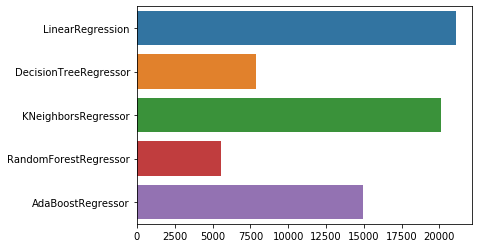

In [54]:
# 모델과 스코어 확인하기
sns.barplot(x=model_score , y=model_list, data=dat)

## 가장 오차가 적은 RandomForestRegressor 모델로 예측해 보기

In [55]:
# 최종 모델 선택 및 제출
model_RF = RandomForestRegressor()
model_RF.fit(X_train, y_train)
pred = model_RF.predict(X_test)
pred[0:10]

C:\Users\WJ\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([ 12.5,   5.6,   5.1,   2.5,   2.4,   5.9,  35.1, 103. , 222.7,
       135.6])

In [56]:
pd.DataFrame( {"pred":pred})

,pred
0,12.500000
1,5.600000
2,5.100000
3,2.500000
4,2.400000
5,5.900000
6,35.100000
7,103.000000
8,222.700000
9,135.600000


### 머신러닝 대표적 앙상블 중의 하나 XGBOOSTING 기법 사용해보기

In [57]:
import xgboost as xgb

### xgb.DMatrix 
 * dense matrix, sparse matrix, local file로부터 DMatrix object 객체를 만든다.

In [58]:
data_dmatrix = xgb.DMatrix(data=X_train,label=y_train)

In [59]:
# 기본 옵션 확인
xg_reg = xgb.XGBRegressor()
xg_reg

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=True, subsample=1)

* learning_rate: 0~1사이의 값. 과적합을 방지하기 위한 단계 크기
* max_depth: 각각의 나무 **모델의 최대 깊이**
* subsample: 각 나무마다 사용하는 샘플 퍼센트, 낮은 값은 underfitting(과소적합)을 야기할 수 있음.
* colsample_bytree: 각 나무마다 사용하는 feature 퍼센트. High value can lead to overfitting.
* n_estimators: 트리의 수(우리가 모델을 생성할)
* loss function(손실함수)결정. 
* objective(목적함수)
   * reg:linear for regression problems(회귀 문제), 
   * reg:logistic for classification problems with only decision(분류 문제), 
   * binary:logistic for classification problems with probability.
* alpha : L1 규제에 대한 항

In [60]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', 
            colsample_bytree = 0.3, # 각나무마다 사용하는 feature 비율
            learning_rate = 0.1,
            max_depth = 3, 
            alpha = 0.1, 
            n_estimators = 100)  # n_estimators=100
xg_reg

XGBRegressor(alpha=0.1, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bytree=0.3, gamma=0, learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=True, subsample=1)

### 학습

In [64]:
xg_reg.fit(X_train,y_train)

XGBRegressor(alpha=0.1, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bytree=0.3, gamma=0, learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=True, subsample=1)

In [65]:
score = cross_val_score(xg_reg, X_train, y_train, 
                        cv=5, scoring="neg_mean_squared_error")
print(score)
print("MSE 평균 :", score.mean())

[ -5605.38991649  -5362.8233258   -4969.87538425 -15938.32225472
 -17667.9364586 ]
MSE 평균 : -9908.869467970968


In [63]:
# 최종 모델 선택 및 제출
model_RF = RandomForestRegressor()
model_RF.fit(X_train, y_train)
predictions = model_RF.predict(X_test)
sub = pd.read_csv("bike/sampleSubmission.csv")
sub['count'] = predictions
sub.to_csv("submission1907.csv", index=False)

C:\Users\WJ\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


## REF
* cross_val_score:
 * https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
* 모델 평가 scoring : https://scikit-learn.org/stable/modules/model_evaluation.html
* XGBOOST Documentation : https://xgboost.readthedocs.io/en/latest/index.html

### History

* 2020-06-08  update
* 2020-09-05  update v12